In [1]:
%env KIF_DEBUG=
%env KIF_RESOLVE_ENTITIES=1

env: KIF_DEBUG=
env: KIF_RESOLVE_ENTITIES=1


# Wikidata

In [2]:
from kif_lib import *
from kif_lib.vocabulary import wd

Create a SPARQL store with Wikidata mappings pointing to the official Wikidata query service:

In [3]:
kb = Store('wdqs') # assumes http://query.wikidata.org/sparql

If a limit on the number of results is not specified, assume 3:

In [4]:
kb.limit = 3

## Label, aliases, and description (pseudo-properties)

In KIF, the label, aliases, and description of entities can be obtained via pseudo-properties:

*list the label, aliases, and description of Brazil in French*

In [5]:
it = kb.filter(subject=wd.Brazil, property=wd.label | wd.alias | wd.description, language='fr', limit=10)
g = Graph(*it)
g

(**Graph**
- (**Statement** (**Item** [Brazil](http://www.wikidata.org/entity/Q155)) (**ValueSnak** **AliasProperty** "Amérique lusophone"@fr))
- (**Statement** (**Item** [Brazil](http://www.wikidata.org/entity/Q155)) (**ValueSnak** **AliasProperty** "Auriverde"@fr))
- (**Statement** (**Item** [Brazil](http://www.wikidata.org/entity/Q155)) (**ValueSnak** **AliasProperty** "Brasil"@fr))
- (**Statement** (**Item** [Brazil](http://www.wikidata.org/entity/Q155)) (**ValueSnak** **AliasProperty** "Brazil"@fr))
- (**Statement** (**Item** [Brazil](http://www.wikidata.org/entity/Q155)) (**ValueSnak** **AliasProperty** "Bresil"@fr))
- (**Statement** (**Item** [Brazil](http://www.wikidata.org/entity/Q155)) (**ValueSnak** **AliasProperty** "Bré."@fr))
- (**Statement** (**Item** [Brazil](http://www.wikidata.org/entity/Q155)) (**ValueSnak** **AliasProperty** "Brés."@fr))
- (**Statement** (**Item** [Brazil](http://www.wikidata.org/entity/Q155)) (**ValueSnak** **AliasProperty** "Brésilien"@fr))
- (**Statement** (**Item** [Brazil](http://www.wikidata.org/entity/Q155)) (**ValueSnak** **AliasProperty** "Brésilienne"@fr))
- (**Statement** (**Item** [Brazil](http://www.wikidata.org/entity/Q155)) (**ValueSnak** **LabelProperty** "Brésil"@fr)))

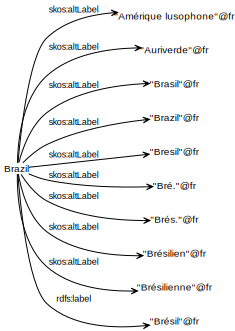

In [6]:
g.to_graphviz()

Alternatively, we can use the folowing entity methods:

In [7]:
wd.Brazil.get_label('fr')

"Brésil"@fr

In [8]:
wd.Brazil.get_aliases('fr')

{Text('Amérique lusophone', 'fr'),
 Text('Auriverde', 'fr'),
 Text('Brasil', 'fr'),
 Text('Brazil', 'fr'),
 Text('Bresil', 'fr'),
 Text('Bré.', 'fr'),
 Text('Brés.', 'fr'),
 Text('Brésilien', 'fr'),
 Text('Brésilienne', 'fr'),
 Text('Brézil', 'fr'),
 Text('République des États-Unis du Brésil', 'fr'),
 Text('République fédérative du Brésil', 'fr'),
 Text('la République fédérative du Brésil', 'fr')}

In [9]:
wd.Brazil.get_description('fr')

"pays d'Amérique du Sud"@fr

### Lexemes: Lemma, lexical category, and language

Lexemes also have associated pseudo-properties:

*obtain the lemma, lexical category, and language of the lexeme L4471*

In [10]:
it = kb.filter(wd.L(4471), wd.lemma | wd.lexical_category | wd.language)
g = Graph(*it)
g

(**Graph**
- (**Statement** (**Lexeme** [wd:L4471](http://www.wikidata.org/entity/L4471)) (**ValueSnak** **LanguageProperty** (**Item** [English](http://www.wikidata.org/entity/Q1860))))
- (**Statement** (**Lexeme** [wd:L4471](http://www.wikidata.org/entity/L4471)) (**ValueSnak** **LemmaProperty** "love"@en))
- (**Statement** (**Lexeme** [wd:L4471](http://www.wikidata.org/entity/L4471)) (**ValueSnak** **LexicalCategoryProperty** (**Item** [verb](http://www.wikidata.org/entity/Q24905)))))

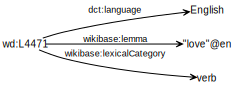

In [11]:
g.to_graphviz()

Again, these pseudo-properties are also accessible through entity methods:

In [13]:
display(
    wd.L(4471).lemma,
    wd.L(4471).category,
    wd.L(44471).language)

"love"@en

(**Item** [verb](http://www.wikidata.org/entity/Q24905))

(**Item** [English](http://www.wikidata.org/entity/Q1860))